## Importing Libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models


## Importing Data

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 6s 0us/step


In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_train[0].shape

(28, 28)

**FUNCTION FOR PLOTTING 10 IMAGES**

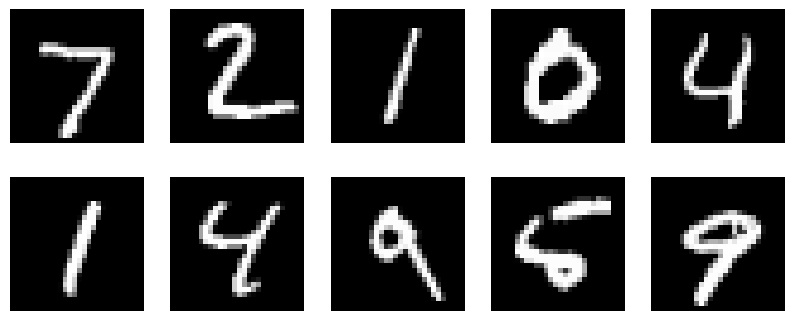

In [15]:
def Plot10Images(X):
    # create figure
    fig = plt.figure(figsize=(10, 4))
    # setting values to rows and column variables
    rows = 2
    columns = 5
    for i in range(rows*columns):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(X[i], cmap = 'gray')
        plt.axis('off')
    plt.show()
Plot10Images(X_test)

In [6]:
y_train[0]

5

In [7]:
X_train = X_train / 255
X_test = X_test / 255

## ANN

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann_history = model.fit(X_train, y_train, epochs=10, validation_split= 0.2)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.9145 - val_loss: 0.1675 - val_accuracy: 0.9544
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1373 - accuracy: 0.9591 - val_loss: 0.1362 - val_accuracy: 0.9588
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0956 - accuracy: 0.9717 - val_loss: 0.1109 - val_accuracy: 0.9667
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0729 - accuracy: 0.9786 - val_loss: 0.1048 - val_accuracy: 0.9677
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0562 - accuracy: 0.9831 - val_loss: 0.1000 - val_accuracy: 0.9714
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0454 - accuracy: 0.9869 - val_loss: 0.0864 - val_accuracy: 0.9741
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0943 - val_accuracy:

In [9]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0882 - accuracy: 0.9769


[0.08818180859088898, 0.9768999814987183]

In [10]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [11]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

## CNN

In [12]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_history = model.fit(X_train, y_train, epochs=5, validation_split= 0.2)

Epoch 1/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1676 - accuracy: 0.9494 - val_loss: 0.0781 - val_accuracy: 0.9769
Epoch 2/5
1500/1500 [==============================] - 16s 10ms/step - loss: 0.0564 - accuracy: 0.9832 - val_loss: 0.0587 - val_accuracy: 0.9832
Epoch 3/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0583 - val_accuracy: 0.9821
Epoch 4/5
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0237 - accuracy: 0.9925 - val_loss: 0.0648 - val_accuracy: 0.9794
Epoch 5/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0162 - accuracy: 0.9947 - val_loss: 0.0478 - val_accuracy: 0.9851


In [14]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0459 - accuracy: 0.9850


[0.04589259624481201, 0.9850000143051147]

#### Using CNN, we get around 98.4% accuracy which is really good.

# Visualization

In [15]:
def plot_accuracy_and_loss(history_object, epochs_no, labels):
    # Check whether the passed arguments are lists or not (expected to be list)
    assert type(history_object) == list
    assert type(labels) == list
    assert type(epochs_no) == list
    
    assert len(history_object) == 2
    # end the check
    
    plt.figure(figsize=(18, 6), dpi=80)
    
    for i in range(1, len(history_object)+1):
        epochs = range(1, epochs_no[i-1]+1)
        plt.subplot(1, 2, i)
        plt.plot(epochs, history_object[i-1].history['accuracy'], label='Accuracy')
        plt.plot(epochs, history_object[i-1].history['val_accuracy'], label='Validation accuracy')
        plt.plot(epochs, history_object[i-1].history['loss'], label='Loss')
        plt.plot(epochs, history_object[i-1].history['val_loss'], label='Validation loss')
        plt.title(f"{labels[i-1]} Accuracy and Validation loss")
        plt.xlabel('Epochs')
        plt.legend()

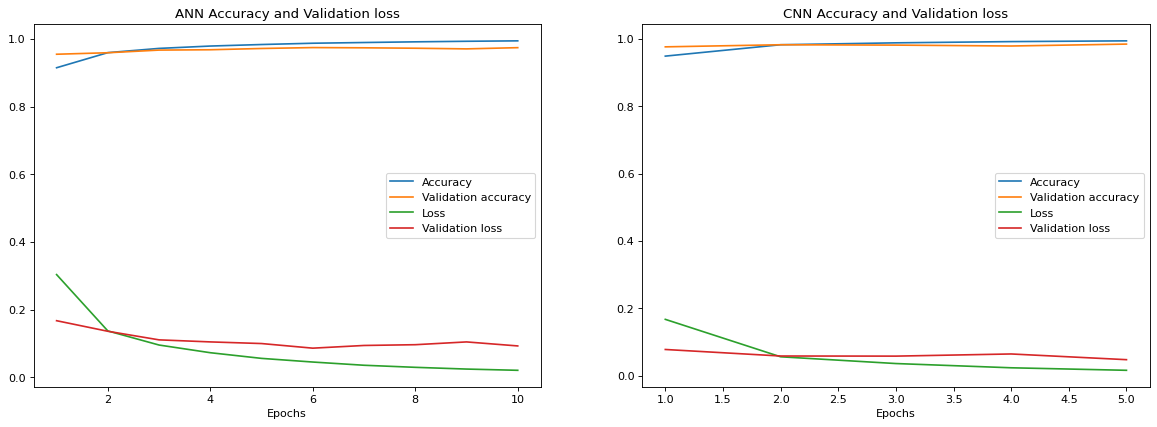

In [16]:
plot_accuracy_and_loss([ann_history, cnn_history], [10, 5], ["ANN", "CNN"])